In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets, tree
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

% matplotlib inline

In [2]:
iris = sns.load_dataset('iris')
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
76,6.8,2.8,4.8,1.4,versicolor
91,6.1,3.0,4.6,1.4,versicolor
2,4.7,3.2,1.3,0.2,setosa


In [3]:
columns=['sepal_length','species']
species=['setosa','virginica']

In [4]:
iris=iris[columns]
iris=iris.loc[iris['species'].isin(species)]
iris.sample(3)

,sepal_length,species
16,5.4,setosa
101,5.8,virginica
1,4.9,setosa


In [5]:
encoder = LabelEncoder()
encoder.fit(iris['species'])
list(encoder.classes_)

['setosa', 'virginica']

In [6]:
transformed=encoder.transform(iris['species'])
iris['species']=transformed


In [7]:
iris.sample(3)

,sepal_length,species
16,5.4,0
102,7.1,1
134,6.1,1


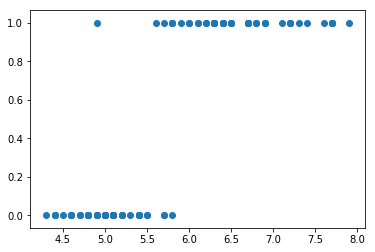

In [8]:
plt.scatter(iris['sepal_length'],iris['species'])
plt.show()

In [9]:
def logit(x):
    return (np.log(x)-np.log(1-x))

In [10]:
def logistic(x,max_length=1,steepness=1):
    #mid=np.mean(x)
    mid=np.mean(x)
    return max_length/(1+np.exp(-steepness*(x-mid)))

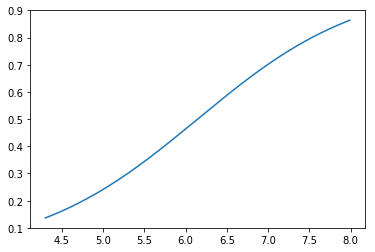

In [11]:
x = np.arange(4.3, 8, 0.01)
plt.plot(x,logistic(x))
plt.show()


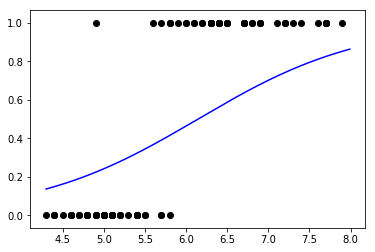

In [12]:
plt.scatter(iris['sepal_length'],iris['species'],color='black')
plt.plot(x,logistic(x),color='blue') # this is the logistic plot
plt.show()
#iris['sepal_length'][:20]

In [13]:
X=np.asmatrix(iris['sepal_length']).transpose()
y=np.asmatrix(iris['species']).transpose()

In [14]:
lr=LogisticRegression()
lr.fit(X,y)

/home/nikhil/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
beta0=lr.intercept_
beta0

array([-4.11618943])

In [16]:
beta1=lr.coef_
beta1

array([[ 0.74360247]])

In [17]:
def predict_prob(x):
    exponent = np.exp(beta0[0] + beta1[0] * x)
    return exponent / (1 + exponent)

In [18]:
def odds(x):
    return x / (1 - x)


##### displaying the results


In [19]:
from IPython.display import display
import prettytable as pt

from IPython.core.display import display, HTML

table = pt.PrettyTable(['sepal_length', '$\hat{p}$', '$1 - \hat{p}$', 'odds'])
part=iris.sample(15)
p=predict_prob(part['sepal_length'])
part['p']=np.round(p,2)

for SL,F,P in part.values: 
       table.add_row([SL,P, 1-P, odds(P)])
display(HTML(table.get_html_string()))
# as the value of sepal_length increases it tell that the iris is more of virginica

sepal_length,$\hat{p}$,$1 - \hat{p}$,odds
5.1,0.42,0.58,0.724137931034
5.0,0.4,0.6,0.666666666667
4.5,0.32,0.68,0.470588235294
6.5,0.67,0.33,2.0303030303
6.9,0.73,0.27,2.7037037037
6.0,0.59,0.41,1.43902439024
5.0,0.4,0.6,0.666666666667
6.7,0.7,0.3,2.33333333333
7.9,0.85,0.15,5.66666666667
5.8,0.55,0.45,1.22222222222
